In [2]:
def filterfunction(data):
    accx = data['accX']
    accz = data['accZ']
    roty = data['rotY']
    ss_angle = 0;
    alpha = 0.04
    sv= []
    for n in range(0, len(data)):
        xacc = accx[n]
        zacc = accz[n]
        ygyro = roty[n]
        
        theta = math.atan2(xacc,zacc)
        ss_angle = (1-alpha)*(ss_angle + (ygyro/104))+alpha*theta
        sv.append(ss_angle*(180/3.14))
    return sv
        


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

#Sportssensor data for up and down in right knee run
data1 = pd.read_csv("new_data15N.csv", header=None)
data1.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data3 = pd.read_csv("new_data15.csv", header=None)
data3.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

#Sportssensor data for up and down in right knee walk
data2 = pd.read_csv("Sensor_07_hjre_ned/data5.csv", header=None)
data2.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]

data4 = pd.read_csv("Sensor_22_hjre_op/data5.csv", header=None)
data4.columns = ["Sample", "Temperature [°C]",  "accX", "accY", "accZ", "rotX", "rotY", "rotZ"]



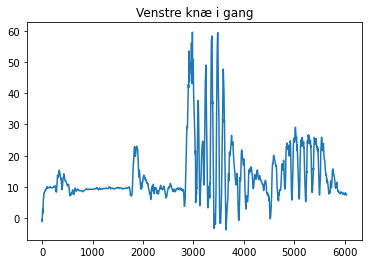

In [4]:
ppF2 = []
for item1, item2 in zip(filterfunction(data4), filterfunction(data2)):
    item = item1 - item2
    ppF2.append(item*-1)

plt.plot(ppF2)
plt.title("Venstre knæ i gang")
plt.show()

In [5]:
ppF2 = pd.DataFrame(ppF2)
ppF2.columns = ['X']
ppF2.to_csv('ppF2.csv')

In [6]:
SPORTS_rightknee_run = pd.read_csv('ppF1.csv')
Vicon_rightknee_run = pd.read_csv('PRO_rightknee2.csv')
SPORTS_rightknee_walk = pd.read_csv('ppF2.csv')
Vicon_rightknee_walk = pd.read_csv('PRO_rightknee.csv')

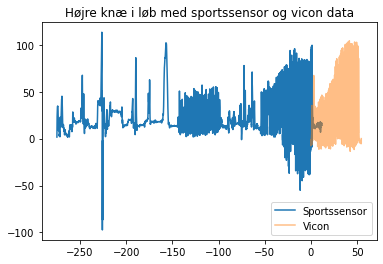

In [7]:
plt.plot((SPORTS_rightknee_run.index-28600)/104, SPORTS_rightknee_run['X'])
plt.plot((Vicon_rightknee_run.index)/200, Vicon_rightknee_run['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.title("Højre knæ i løb med sportssensor og vicon data")
plt.show()


In [8]:
SPORTS_rightknee_run.drop(index=data1.index[:23260], 
        axis=0, 
        inplace=True)
SPORTS_rightknee_run.reset_index(inplace=True)

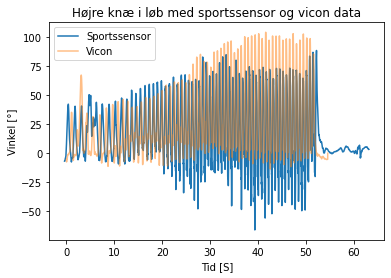

In [9]:
plt.plot((SPORTS_rightknee_run.index-40)/104, (SPORTS_rightknee_run['X']-11))
plt.plot((Vicon_rightknee_run.index)/200, Vicon_rightknee_run['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.xlabel("Tid [S]")
plt.ylabel("Vinkel [°]")
plt.title("Højre knæ i løb med sportssensor og vicon data")
plt.show()

In [10]:
SPORTS_rightknee_walk.drop(index=data1.index[:2725], 
        axis=0, 
        inplace=True)
SPORTS_rightknee_walk.reset_index(inplace=True)
SPORTS_rightknee_walk.drop(SPORTS_rightknee_walk.tail(2000).index,
        inplace = True)

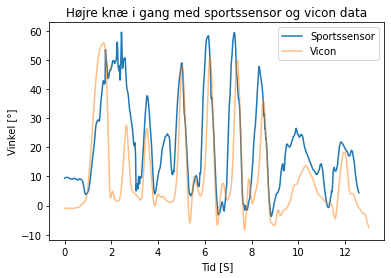

In [11]:
plt.plot((SPORTS_rightknee_walk.index)/104, (SPORTS_rightknee_walk['X']))
plt.plot((Vicon_rightknee_walk.index)/200, Vicon_rightknee_walk['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.title("Højre knæ i gang med sportssensor og vicon data")
plt.xlabel("Tid [S]")
plt.ylabel("Vinkel [°]")
plt.show()

# Interpolation of data

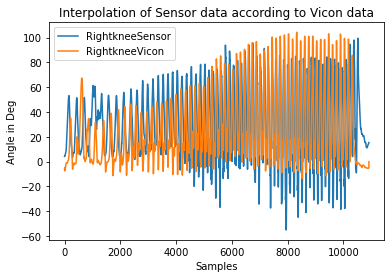

In [12]:
import scipy.interpolate
from sklearn.metrics import precision_score

SPORTS_rightknee_run_new = SPORTS_rightknee_run['X'][0:len(SPORTS_rightknee_run)]
x_inter = (SPORTS_rightknee_run_new.index)/104
y_interp = scipy.interpolate.interp1d(x_inter, SPORTS_rightknee_run_new, fill_value="extrapolate")     
x_interVicon = Vicon_rightknee_run.index/200
newSportData_run = []
for i in range(0,len(x_interVicon),1):
    newSportData_run.append(y_interp(i/200))  
#find y-value associated with x-value of 13
plt.plot(newSportData_run)
plt.plot((Vicon_rightknee_run.index),Vicon_rightknee_run['X'])
plt.title("Interpolation of Sensor data according to Vicon data")
plt.legend(["RightkneeSensor", "RightkneeVicon"])
plt.xlabel('Samples')
plt.ylabel('Angle in Deg') 
plt.show()

10914


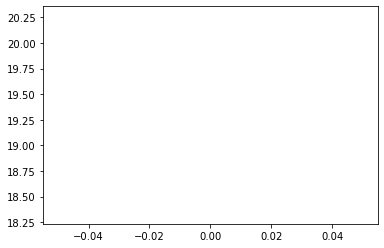

19.296111175240526

In [13]:
print(len(newSportData_run))

fs = sum(Vicon_rightknee_run['X'])
fs2 = sum(newSportData_run)

#fs = [int(x) for x in Vicon_rightknee_run['X']] 
#fs2 = [int(x) for x in newSportData_run] 

#for index, item in enumerate(fs):
#    if item == 0:
#        fs[index] = fs[index]+1
        
#for index, item in enumerate(fs2):
#    if item == 0:
#        fs2[index] = fs2[index]+1        


#res = [i / j for i, j in zip(fs, fs2)]

res = (fs2/fs)*100-100

plt.plot(res)
plt.show()

res



<class 'pandas.core.frame.DataFrame'>
0.8074276836576163


/var/folders/5p/lkh4b4h17fb_lbf80l_5jhh80000gn/T/ipykernel_6063/193689301.py:22: RuntimeWarning: divide by zero encountered in true_divide
  p = y_pred/y_true


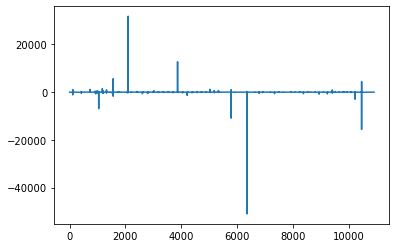

In [14]:
print(type(Vicon_rightknee_run))
y_true = []
y_pred = []
df1 = pd.DataFrame (Vicon_rightknee_run, columns = ['X'])
df2 = pd.DataFrame (newSportData_run, columns = ['X'])
y_true = df1.values.tolist()
y_pred = df2.values.tolist()
#precision_score(y_true, y_pred, average=None)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

#prec = y_true/(y_true+y_pred)
prec = 10914/(10914+2603)
print(prec)

precission = []
for item1, item2 in zip(y_true, y_pred):
    item = item1 / (item1 + item2) 
    precission.append(item)

#plt.plot(precission)
p = y_pred/y_true
plt.plot(p)


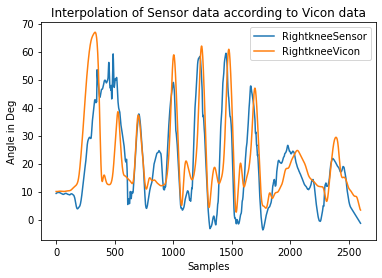

In [15]:
import scipy.interpolate
from sklearn.metrics import precision_score

SPORTS_rightknee_walk_new = SPORTS_rightknee_walk['X'][0:len(SPORTS_rightknee_walk)]
x_inter = (SPORTS_rightknee_walk_new.index)/104
y_interp = scipy.interpolate.interp1d(x_inter, SPORTS_rightknee_walk_new, fill_value="extrapolate")     
x_interVicon = Vicon_rightknee_walk.index/200
newSportData = []
for i in range(0,len(x_interVicon),1):
    newSportData.append(y_interp(i/200))  
#find y-value associated with x-value of 13
plt.plot(newSportData)
plt.plot((Vicon_rightknee_walk.index),Vicon_rightknee_walk['X']+11)
plt.title("Interpolation of Sensor data according to Vicon data")
plt.legend(["RightkneeSensor", "RightkneeVicon"])
plt.xlabel('Samples')
plt.ylabel('Angle in Deg') 
plt.show()

In [16]:
fs3 = sum(Vicon_rightknee_walk['X']+11)
fs4 = sum(newSportData)

fs3/fs4*100-100



4.532813164425804

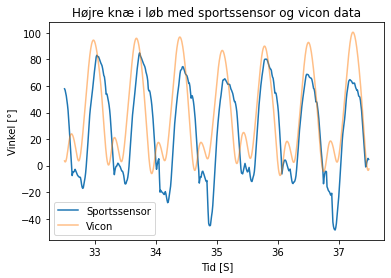

In [17]:
newsport = SPORTS_rightknee_run['X'][3380:3900]
newvicon = Vicon_rightknee_run['X'][6500:7500]
newsport_index = SPORTS_rightknee_run.index[3380:3900]
newvicon_index = Vicon_rightknee_run.index[6500:7500]

plt.plot((newsport_index)/104, (newsport-11))
plt.plot((newvicon_index)/200, newvicon, alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.xlabel("Tid [S]")
plt.ylabel("Vinkel [°]")
plt.title("Højre knæ i løb med sportssensor og vicon data")
plt.show()


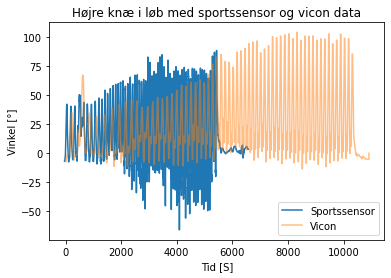

In [18]:
plt.plot((SPORTS_rightknee_run.index-40), (SPORTS_rightknee_run['X']-11))
plt.plot((Vicon_rightknee_run.index), Vicon_rightknee_run['X'], alpha = 0.5)
plt.legend(["Sportssensor", "Vicon"])
plt.xlabel("Tid [S]")
plt.ylabel("Vinkel [°]")
plt.title("Højre knæ i løb med sportssensor og vicon data")
plt.show()

# Vicon data shown


In [19]:
Vicon_leftknee_walk = pd.read_csv('PRO_leftknee.csv')
Vicon_rightknee_walk = pd.read_csv('PRO_rightknee.csv')
Vicon_leftknee_run = pd.read_csv('PRO_leftknee2.csv')
Vicon_rightknee_run = pd.read_csv('PRO_rightknee2.csv')

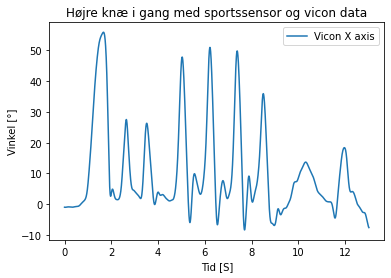

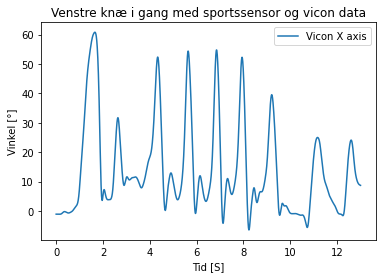

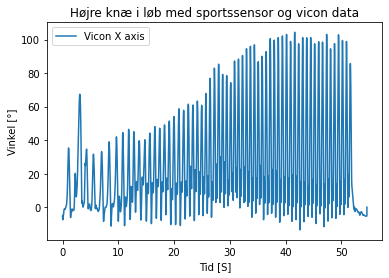

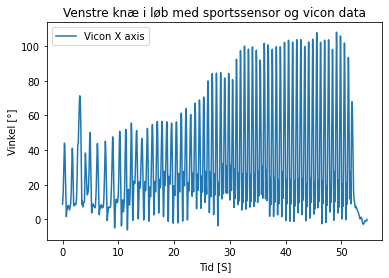

In [20]:
plt.plot((Vicon_rightknee_walk.index)/200, Vicon_rightknee_walk['X'])
plt.legend(["Vicon X axis"])
plt.title("Højre knæ i gang med sportssensor og vicon data")
plt.xlabel("Tid [S]")
plt.ylabel("Vinkel [°]")
plt.show()

plt.plot((Vicon_leftknee_walk.index)/200, Vicon_leftknee_walk['X'])
plt.legend(["Vicon X axis"])
plt.title("Venstre knæ i gang med sportssensor og vicon data")
plt.xlabel("Tid [S]")
plt.ylabel("Vinkel [°]")
plt.show()

plt.plot((Vicon_rightknee_run.index)/200, Vicon_rightknee_run['X'])
plt.legend(["Vicon X axis"])
plt.title("Højre knæ i løb med sportssensor og vicon data")
plt.xlabel("Tid [S]")
plt.ylabel("Vinkel [°]")
plt.show()

plt.plot((Vicon_leftknee_run.index)/200, Vicon_leftknee_run['X'])
plt.legend(["Vicon X axis"])
plt.title("Venstre knæ i løb med sportssensor og vicon data")
plt.xlabel("Tid [S]")
plt.ylabel("Vinkel [°]")
plt.show()